In [ ]:
!pip install pycaret

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

# Data Preprocessing

In [ ]:
train.columns

Index(['AGE', 'Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy', 'Survival period', 'Death'],
      dtype='object')

In [ ]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [ ]:
type_of_drink = encoder.fit_transform(train[['Type of Drink']]).toarray()
type_of_drink_col = encoder.get_feature_names_out(['Type of Drink'])

smoke = encoder.fit_transform(train[['Smoke']]).toarray()
smoke_col = encoder.get_feature_names_out(['Smoke'])

egfr_mutation = encoder.fit_transform(train[['EGFR mutation Detection']]).toarray()
egfr_mutation_col = encoder.get_feature_names_out(['EGFR mutation Detection'])

train.drop(['Type of Drink', 'Smoke', 'EGFR mutation Detection'], axis=1, inplace=True)

# 인코딩된 열 추가
train[type_of_drink_col] = type_of_drink
train[smoke_col] = smoke
train[egfr_mutation_col] = egfr_mutation

In [ ]:
type_of_drink = encoder.fit_transform(test[['Type of Drink']]).toarray()
type_of_drink_col = encoder.get_feature_names_out(['Type of Drink'])

smoke = encoder.fit_transform(test[['Smoke']]).toarray()
smoke_col = encoder.get_feature_names_out(['Smoke'])

egfr_mutation = encoder.fit_transform(test[['EGFR mutation Detection']]).toarray()
egfr_mutation_col = encoder.get_feature_names_out(['EGFR mutation Detection'])

test.drop(['Type of Drink', 'Smoke', 'EGFR mutation Detection'], axis=1, inplace=True)

# 인코딩된 열 추가
test[type_of_drink_col] = type_of_drink
test[smoke_col] = smoke
test[egfr_mutation_col] = egfr_mutation

# EDA


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
con_features = ['AGE', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P', 'Survival period']

In [ ]:
dis_feaures = ['Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy',]

In [ ]:
# 8:2 정도로 0, 1
death_counts = train['Death'].value_counts()
print(death_counts)

Death
0    7897
1    2103
Name: count, dtype: int64


In [ ]:
train.describe()

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,TX,T0,T1,T1a,T1b,T1c,...,Type of Drink_1,Type of Drink_2,Type of Drink_3,Type of Drink_99,Smoke_0,Smoke_1,Smoke_2,EGFR mutation Detection_0,EGFR mutation Detection_1,EGFR mutation Detection_99
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,63.005500,0.691900,0.184000,0.293800,0.197300,0.038000,0.159800,0.150800,0.103900,0.086000,...,0.094900,0.434500,0.074600,0.396000,0.204500,0.114700,0.68080,0.162100,0.148000,0.689900
std,13.906603,0.461731,0.387504,0.455524,0.397981,0.191206,0.366439,0.357872,0.305146,0.280378,...,0.293091,0.495716,0.262758,0.489089,0.403356,0.318675,0.46619,0.368561,0.355118,0.462557
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000
75%,74.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


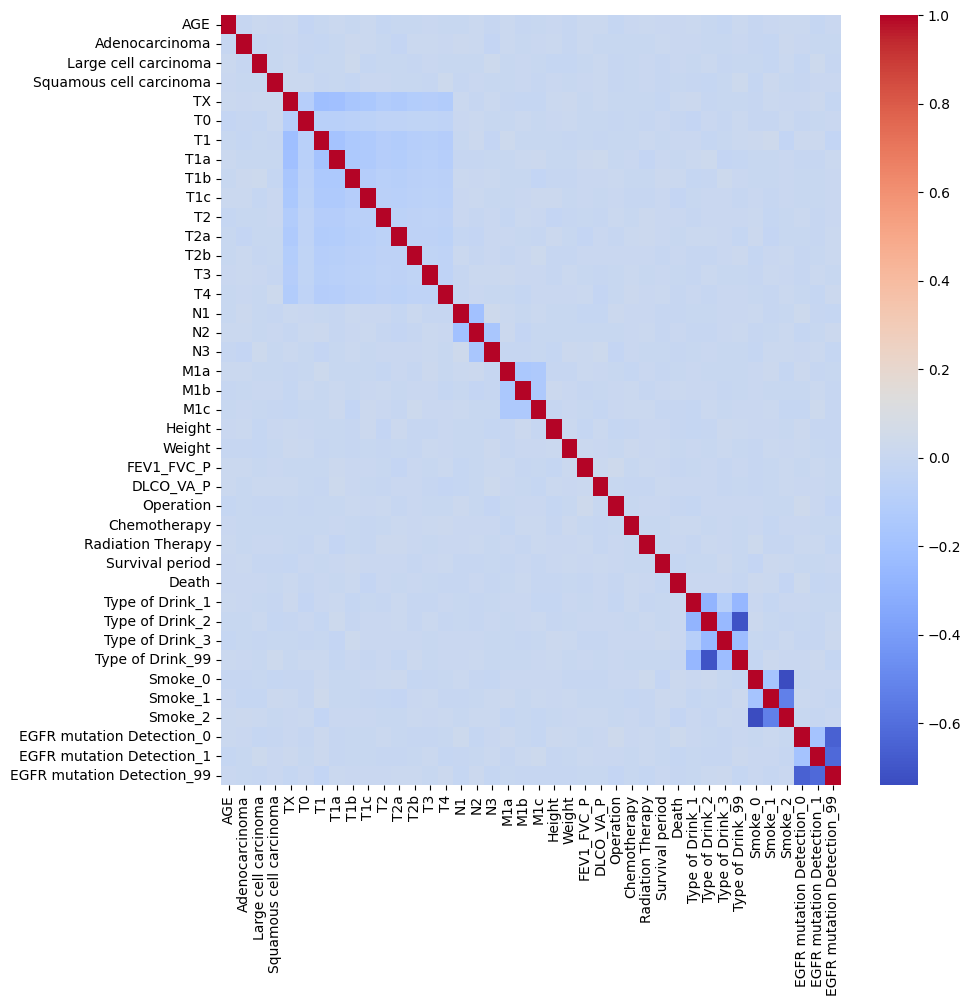

In [ ]:
corr = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

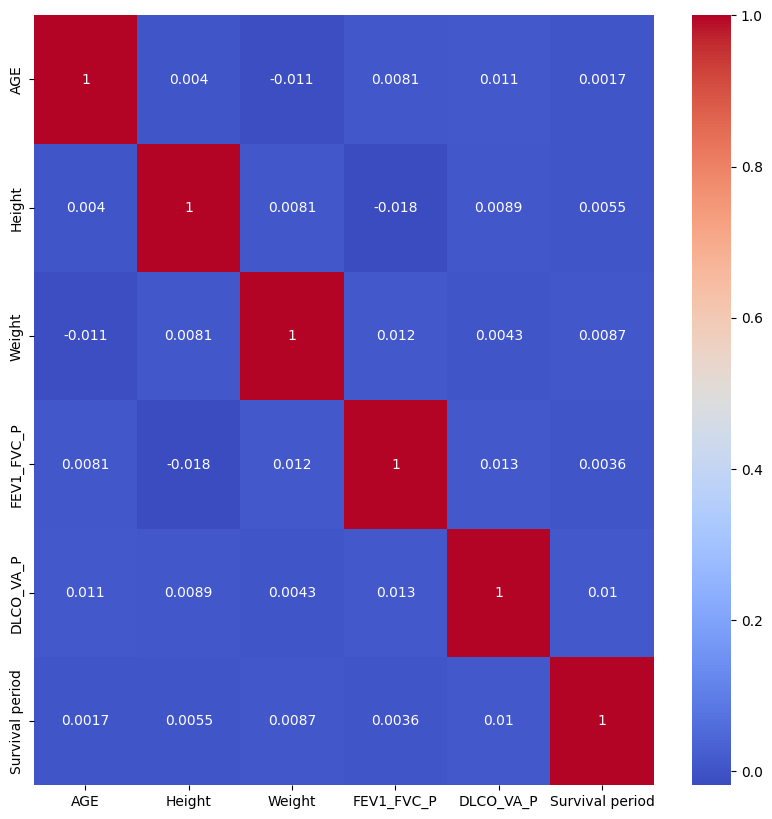

In [ ]:
corr = train[con_features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,TX,T0,T1,T1a,T1b,T1c,...,Type of Drink_1,Type of Drink_2,Type of Drink_3,Type of Drink_99,Smoke_0,Smoke_1,Smoke_2,EGFR mutation Detection_0,EGFR mutation Detection_1,EGFR mutation Detection_99
AGE,1.000000,-0.009985,0.013416,0.003329,0.007755,-0.025090,-0.002057,0.010906,-0.005885,0.011164,...,0.010202,-0.005860,-0.015248,0.008017,-0.012966,0.002904,0.009233,0.009465,-0.015718,0.004525
Adenocarcinoma,-0.009985,1.000000,-0.010115,-0.000381,0.003201,-0.010107,-0.015756,-0.002654,0.017828,0.008471,...,0.002503,-0.000133,-0.005900,0.001805,-0.006409,-0.019445,0.018838,0.004367,-0.004887,0.000272
Large cell carcinoma,0.013416,-0.010115,1.000000,-0.000902,0.007761,-0.018789,-0.003544,-0.000340,0.027762,-0.013108,...,0.000338,0.010163,-0.008117,-0.006142,-0.000819,-0.018666,0.013468,-0.016991,0.027385,-0.007486
Squamous cell carcinoma,0.003329,-0.000381,-0.000902,1.000000,0.007907,0.008446,-0.009282,-0.004325,-0.019612,0.001826,...,-0.009600,-0.013978,-0.004324,0.022244,-0.016776,0.020676,0.000381,-0.007297,0.003200,0.003358
TX,0.007755,0.003201,0.007761,0.007907,1.000000,-0.098535,-0.216214,-0.208921,-0.168817,-0.152077,...,0.017801,-0.007233,-0.000178,-0.003241,-0.008397,0.009224,0.000960,0.002848,0.017688,-0.015849
T0,-0.025090,-0.010107,-0.018789,0.008446,-0.098535,1.000000,-0.086676,-0.083753,-0.067676,-0.060965,...,-0.021526,0.004104,-0.008655,0.013389,-0.008701,-0.009168,0.013796,-0.007944,-0.000353,0.006601
T1,-0.002057,-0.015756,-0.003544,-0.009282,-0.216214,-0.086676,1.000000,-0.183778,-0.148500,-0.133774,...,0.006844,-0.014497,-0.001258,0.011268,0.015704,0.028870,-0.033322,0.018486,0.015752,-0.026823
T1a,0.010906,-0.002654,-0.000340,-0.004325,-0.208921,-0.083753,-0.183778,1.000000,-0.143491,-0.129262,...,0.011338,0.021295,-0.022863,-0.016095,-0.005117,-0.000849,0.005008,-0.007921,-0.008801,0.013068
T1b,-0.005885,0.017828,0.027762,-0.019612,-0.168817,-0.067676,-0.148500,-0.143491,1.000000,-0.104449,...,-0.016327,-0.007567,0.023064,0.005063,-0.004449,-0.004292,0.006783,-0.003932,-0.000712,0.003680
T1c,0.011164,0.008471,-0.013108,0.001826,-0.152077,-0.060965,-0.133774,-0.129262,-0.104449,1.000000,...,-0.001964,0.003835,0.006576,-0.006243,0.003652,-0.010792,0.004217,-0.000393,-0.004299,0.003614


In [ ]:
for feature in dis_features:
    plt.figure(figsize=(8, 6))
    counts = train[feature].value_counts()

    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

ValueError: No group keys passed!

<Figure size 800x600 with 0 Axes>

In [ ]:
for feature in train.columns:
  print(feature,':',len(train[feature].unique()))

AGE : 52
Adenocarcinoma : 2
Large cell carcinoma : 2
Squamous cell carcinoma : 2
TX : 2
T0 : 2
T1 : 2
T1a : 2
T1b : 2
T1c : 2
T2 : 2
T2a : 2
T2b : 2
T3 : 2
T4 : 2
N1 : 2
N2 : 2
N3 : 2
M1a : 2
M1b : 2
M1c : 2
Height : 327
Weight : 388
FEV1_FVC_P : 63
DLCO_VA_P : 113
Operation : 2
Chemotherapy : 2
Radiation Therapy : 2
Survival period : 209
Death : 2
Type of Drink_1 : 2
Type of Drink_2 : 2
Type of Drink_3 : 2
Type of Drink_99 : 2
Smoke_0 : 2
Smoke_1 : 2
Smoke_2 : 2
EGFR mutation Detection_0 : 2
EGFR mutation Detection_1 : 2
EGFR mutation Detection_99 : 2


In [ ]:
for feature in test.columns:
  print(feature,':',len(test[feature].unique()))

AGE : 54
Adenocarcinoma : 2
Large cell carcinoma : 2
Squamous cell carcinoma : 2
TX : 2
T0 : 2
T1 : 2
T1a : 2
T1b : 2
T1c : 2
T2 : 2
T2a : 2
T2b : 2
T3 : 2
T4 : 2
N1 : 2
N2 : 2
N3 : 2
M1a : 2
M1b : 2
M1c : 2
Height : 290
Weight : 344
FEV1_FVC_P : 61
DLCO_VA_P : 108
Operation : 2
Chemotherapy : 2
Radiation Therapy : 2
Survival period : 209
Type of Drink_1 : 2
Type of Drink_2 : 2
Type of Drink_3 : 2
Type of Drink_99 : 2
Smoke_0 : 2
Smoke_1 : 2
Smoke_2 : 2
EGFR mutation Detection_0 : 2
EGFR mutation Detection_1 : 2
EGFR mutation Detection_99 : 2


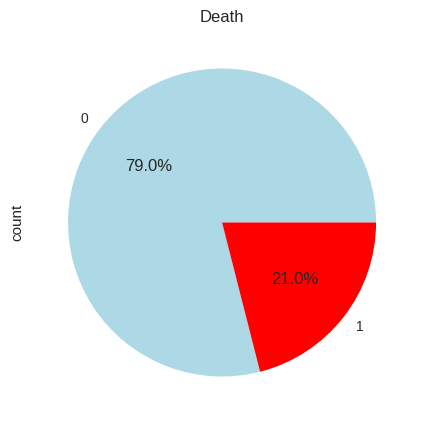

In [ ]:
# train set에서 죽음 20%
plt.figure(figsize=(5, 5))
train['Death'].value_counts().plot.pie(autopct='%.1f%%',
                                       colors=['lightblue','red'])
plt.title('Death')
plt.show()

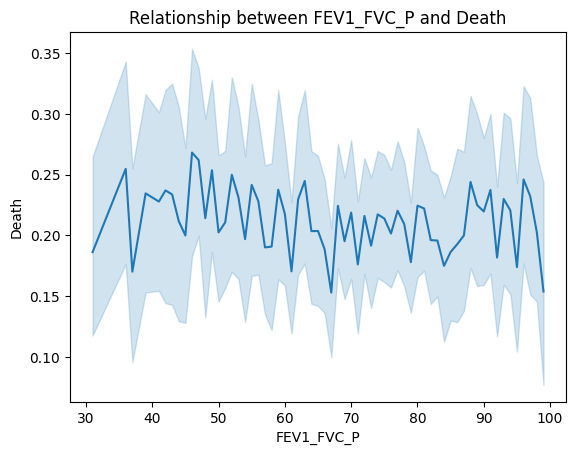

In [ ]:
sns.lineplot(x='FEV1_FVC_P', y='Death',data=train[['FEV1_FVC_P','Death']])

plt.title('Relationship between FEV1_FVC_P and Death')
plt.show()

# Train Test Split

In [ ]:
# sample
X_train = train.drop('Death', axis=1)
y_train = train['Death'] # Death label
X_test = test

In [ ]:
X_test_cols = X_test.columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=321)

In [ ]:
# 오버 샘플링 수행시 정확도 떨어짐 -> 도대체 왜?..
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='minority')
#X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Selection



In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

selector = SelectKBest(score_func=chi2, k=20)

X_train = selector.fit_transform(X_train, y_train)

X_test = selector.transform(X_test)
print(X_train.shape, X_test.shape)

(10000, 20) (5000, 20)


In [ ]:
selector.scores_

array([1.41241584e+00, 7.49314757e-03, 3.30399985e-01, 4.84361384e-02,
       6.93848642e-01, 3.82635532e-01, 4.51028613e-01, 1.81566029e-02,
       9.05284181e-01, 4.68155360e+00, 2.94337796e-01, 9.88607680e-02,
       2.86431007e-01, 1.30693114e-01, 8.52260052e-01, 8.99378302e-01,
       2.38941615e-01, 5.35351151e-01, 3.42603850e-05, 1.07839990e+00,
       4.83385555e-01, 4.42219460e-01, 2.60223451e-01, 6.06396025e+00,
       1.34723470e+00, 1.90954406e-01, 5.16048507e-01, 1.76394076e-01,
       4.87607722e+02, 1.28897634e-02, 7.27721828e-02, 4.08748388e-01,
       3.79016083e-01, 2.29799599e+00, 1.47919161e+00, 1.76900575e+00,
       4.84193548e+00, 2.19815649e+00, 1.44335818e-01])

# scikit-survival

In [ ]:
pip install scikit-survival

In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()

In [ ]:
# sample
X_train = train.drop(columns=['Survival period', 'Death'])
y_train = np.array([(death, period) for death, period in zip(train['Death'], train['Survival period'])],
                   dtype=[('event', '?'), ('time', '<f8')])

In [ ]:
estimator.fit(X_train, y_train)

In [ ]:
from sksurv.metrics import concordance_index_censored

estimator.score(X_train, y_train)

0.5319123769959024

In [ ]:
X_test = test.drop(columns=['Survival period'])

pred_surv = estimator.predict(X_test)

In [ ]:
pred_surv

array([12.68032805, 12.72273   , 12.77385857, ..., 12.81331255,
       12.51920074, 12.79071723])

# GridCV

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Classifier ##
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

names = ["linear_svm", "kernel_svm", "dt", "rf", "mlp"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
]
parameters = {
    "linear_svm": {"kernel": ["linear"], "C": [0.01, 0.5, 1]},
    "kernel_svm": {"kernel": ["rbf", "poly"], "gamma": [1, 2], "C": [1, 2]},
    "dt": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 10],
        "min_samples_split": [0.05, 0.1],
    },
    "rf": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 10],
        "n_estimators": [100, 1000, 2000],
    },
    "mlp": {
        "hidden_layer_sizes": [100, 500, 1000],
        "activation": ["relu", "logistic", "tanh"],
        "solver": ["adam"],
        "alpha": [0.1, 0.01, 1e-3],
        "batch_size": [10, 30, 100],
        "max_iter": [100, 500, 1000, 2000],
    },
}
model = {}
for name, clf in zip(names, classifiers):
    grid_search = GridSearchCV(clf, parameters[name], n_jobs=-1, cv=3)
    grid_search.fit(X_train, y_train)
    model[name] = {"best_estimator": grid_search.best_estimator_}
    model[name]["score"] = grid_search.best_estimator_.score(X_test, y_test)


# MLP

In [ ]:
#from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam',
                    alpha=0.01, batch_size=32, learning_rate='adaptive', max_iter=1000)
mlp.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = mlp.predict(X_test) # 예측 라벨
accuracy_score(y_test, y_pred)

0.7863636363636364

# PySurvival - DeepSurv

In [ ]:
!wget https://www.python.org/ftp/python/3.6.9/Python-3.6.9.tgz
!tar xvfz Python-3.6.9.tgz
!Python-3.6.9/configure
!make
!sudo make install

In [ ]:
!python --version

Python 3.6.9


In [ ]:
!pip install pysurvival

  Using cached pysurvival-0.1.2.tar.gz (4.7 MB)
  Preparing metadata (setup.py) ... done
  Using cached progressbar-2.5.tar.gz (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from pysurvival.models.semi_parametric import DeepSurvivalMachines
from pysurvival.utils.metrics import concordance_index

ModuleNotFoundError: No module named 'pysurvival'

# Pycaret

In [ ]:
from sklearn.preprocessing import RobustScaler

# 정규화
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test = pd.DataFrame(X_test, columns= X_test_cols)

In [ ]:
from pycaret.classification import *

clf = setup(data = X_train, target = y_train, session_id=123)

,Description,Value
0,Session id,123
1,Target,Death
2,Target type,Binary
3,Original data shape,"(10000, 40)"
4,Transformed data shape,"(10000, 40)"
5,Transformed train set shape,"(7000, 40)"
6,Transformed test set shape,"(3000, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


In [ ]:
top5 = compare_models(sort='Accuracy', n_select=5)
# 정확도 우수 모델: lr, svm, ridge, ada, lda

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7897,0.4916,0.0000,0.0000,0.0000,0.0000,0.0000,1.4850
ridge,Ridge Classifier,0.7897,0.4906,0.0000,0.0000,0.0000,0.0000,0.0000,0.0880
ada,Ada Boost Classifier,0.7897,0.4893,0.0000,0.0000,0.0000,0.0000,0.0000,0.4810
lda,Linear Discriminant Analysis,0.7897,0.4906,0.0000,0.0000,0.0000,0.0000,0.0000,0.0770
dummy,Dummy Classifier,0.7897,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1020
rf,Random Forest Classifier,0.7896,0.4934,0.0000,0.0000,0.0000,-0.0003,-0.0020,1.2260
gbc,Gradient Boosting Classifier,0.7886,0.4876,0.0020,0.1667,0.0040,0.0001,0.0013,1.1440
et,Extra Trees Classifier,0.7879,0.5039,0.0115,0.3608,0.0222,0.0094,0.0295,1.1730
lightgbm,Light Gradient Boosting Machine,0.7859,0.4949,0.0088,0.2505,0.0170,0.0025,0.0079,1.7180
xgboost,Extreme Gradient Boosting,0.7649,0.4949,0.0340,0.1873,0.0574,-0.0092,-0.0126,0.2630


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
tuned_top5 = [tune_model(i) for i in top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7900,0.4901,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7900,0.5415,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7900,0.4535,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7900,0.4917,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7900,0.5038,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7900,0.5112,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7900,0.5012,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7900,0.4633,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7886,0.4851,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7900,0.5197,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7900,0.4892,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7900,0.5073,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7900,0.4684,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7900,0.5040,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7900,0.4965,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7900,0.5428,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7900,0.4577,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7886,0.5304,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7900,0.4912,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7900,0.5419,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7900,0.4532,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7900,0.4922,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7900,0.5049,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7900,0.5104,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7900,0.5003,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7900,0.4638,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7886,0.4846,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7900,0.4799,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7900,0.4603,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7900,0.4726,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7900,0.4902,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7900,0.5018,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7900,0.5014,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7900,0.4942,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7900,0.4891,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7886,0.5091,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7900,0.4900,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7900,0.5420,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7900,0.4704,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7900,0.5027,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7900,0.5300,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7900,0.5059,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7900,0.5244,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7900,0.4858,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7886,0.4952,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_top5

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001),
 AdaBoostClassifier(algorithm='SAMME.R', estima

In [ ]:
blend_top5 = blend_models(tuned_top5, n_jobs=1)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:10:15
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

ValueError: cannot set WRITEABLE flag to True of this array

In [ ]:
final_model = finalize_model(lr)
pred = predict_model(final_model, data = X_test)

KeyError: "None of [Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',\n       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',\n       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',\n       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',\n       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',\n       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',\n       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',\n       'feature_36', 'feature_37', 'feature_38', 'feature_39'],\n      dtype='object')] are in the [columns]"

# LGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=90, n_jobs=-1, boost_from_average=False)
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')

y_pred = lgbm.predict(X_test)
accuracy_score(y_test, y_pred)

# Logistic Regression


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # 예측 라벨
accuracy_score(y_test, y_pred)

0.7863636363636364

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # 예측 라벨

result = pd.read_csv('/content/submission.csv', encoding = 'cp949')# 파일 넣기
submission_id = result['ID']
submission_label = pd.DataFrame(y_pred,columns = ['Death'])
submission = pd.concat([submission_id,submission_label],axis=1)
submission.to_csv('result.csv', index = False, encoding = 'utf-8-sig')

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0]), array([5000]))

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import QuantileTransformer

# 정규화
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# SVM 모델 생성
model = SVC(kernel='poly', C = 3, degree = 3)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# test 데이터셋도 정규화(train 데이터셋 기준으로 학습시킨 정규화 모듈 사용)

y_pred = model.predict(X_test) # 예측 라벨
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import QuantileTransformer

# 정규화
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# SVM 모델 생성
model = SVC(kernel='poly', C = 0.5, gamma=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # 예측 라벨

result = pd.read_csv('/content/submission.csv', encoding = 'cp949')# 파일 넣기
submission_id = result['ID']
submission_label = pd.DataFrame(y_pred,columns = ['Death'])
submission = pd.concat([submission_id,submission_label],axis=1)
submission.to_csv('result.csv', index = False, encoding = 'utf-8-sig')

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# trainData CSV 읽어오기
trainDS = pd.read_csv('train-lungcancer.csv')

col_cat_train = ['Adenocarcinoma','Large cell carcinoma','Squamous cell carcinoma','Type of Drink','Smoke',
                 'EGFR mutation Detection','Operation','Chemotherapy','Radiation Therapy', 'Death',
                 'TX','T0','T1','T1a','T1b','T1c','T2','T2a','T2b','T3','T4','N1','N2','N3','M1a','M1b','M1c']
trainDS[col_cat_train] = trainDS[col_cat_train].astype('category')

X = trainDS[['AGE','Adenocarcinoma','Large cell carcinoma','Squamous cell carcinoma','Type of Drink',
             'Smoke','Height','Weight','FEV1_FVC_P','DLCO_VA_P','EGFR mutation Detection',
             'Operation','Chemotherapy','Radiation Therapy','Survival period',
             'TX','T0','T1','T1a','T1b','T1c','T2','T2a','T2b','T3','T4',
             'N1','N2','N3','M1a','M1b','M1c']]
y = trainDS[['Death']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=14)

# 정규화 후 학습데이터로 훈련
scaler=StandardScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
scaler.fit(X_test)
X_scaled_test=scaler.transform(X_test)

# SVM 모델 생성
model=SVC(kernel='rbf', C=50, gamma=0.34)

# train scaled 데이터로 모델 훈련
y_train_a = y_train.values.ravel()
model.fit(X_scaled_train, y_train_a)
pred_train=model.predict(X_scaled_test)
y_test_a = y_test.values.ravel()

# testData CSV 읽어오기
testDS = pd.read_csv('test-lungcancer.csv')

col_cat_test = ['Adenocarcinoma','Large cell carcinoma','Squamous cell carcinoma','Type of Drink','Smoke',
                'EGFR mutation Detection','Operation','Chemotherapy','Radiation Therapy',
                'TX','T0','T1','T1a','T1b','T1c','T2','T2a','T2b','T3','T4','N1','N2','N3','M1a','M1b','M1c']
testDS[col_cat_test] = testDS[col_cat_test].astype('category')
XX = testDS[['AGE','Adenocarcinoma','Large cell carcinoma','Squamous cell carcinoma','Type of Drink',
             'Smoke','Height','Weight','FEV1_FVC_P','DLCO_VA_P','EGFR mutation Detection',
             'Operation','Chemotherapy','Radiation Therapy','Survival period',
             'TX','T0','T1','T1a','T1b','T1c','T2','T2a','T2b','T3','T4',
             'N1','N2','N3','M1a','M1b','M1c']]

# 정규화 후 학습데이터로 훈련
scaler=StandardScaler()
scaler.fit(XX)
XX_scaled=scaler.transform(XX)
scaler.fit(XX_scaled)
pred_train=model.predict(XX_scaled)

result = pd.read_csv('submission.csv', encoding = 'cp949')# 파일 넣기
submission_id = result['ID']
submission_label = pd.DataFrame(pred_train,columns = ['Death'])
submission = pd.concat([submission_id,submission_label],axis=1)
submission.to_csv('result.csv', mode="w", index = False, encoding = 'utf-8-sig')

# NB

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score

# 정규화 작업
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


# 나이브 베이즈 모델 선언 및 학습
model = CategoricalNB()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)

y_pred = model.predict(X_test) # 예측 라벨
accuracy_score(y_test, y_pred)

0.7387878787878788

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score

# 정규화 작업
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # 예측 라벨
accuracy_score(y_test, y_pred)

0.7051515151515152

# Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
normalize = preprocessing.Normalization()
normalize.adapt(X_train)

In [ ]:
model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])

model.compile(loss=tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
210/210 [==============================] - 1s 2ms/step - loss: 0.2144
Epoch 2/10
210/210 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 3/10
210/210 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 4/10
210/210 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 5/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1774
Epoch 6/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1768
Epoch 7/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1769
Epoch 8/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1758
Epoch 9/10
210/210 [==============================] - 1s 2ms/step - loss: 0.1753
Epoch 10/10
210/210 [==============================] - 1s 2ms/step - loss: 0.1751


In [ ]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 1s 6ms/step - loss: 0.1766


0.17657525837421417

# result

In [ ]:
y_pred = np.zeros(5000)

In [ ]:
result = pd.read_csv('/content/submission.csv', encoding = 'cp949')# 파일 넣기
submission_id = result['ID']
submission_label = pd.DataFrame(y_pred,columns = ['Death'])
submission = pd.concat([submission_id,submission_label],axis=1)
submission.to_csv('result.csv', index = False, encoding = 'utf-8-sig')